<a href="https://colab.research.google.com/github/KehEatCode/Projects/blob/main/Convolutional%20Neural%20Networks%3A%20Street%20View%20Housing%20Number%20Digit%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks Project: Street View Housing Number Digit Recognition**



Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a CNN model that can recognize the digits in the images.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [129]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [130]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [131]:
print(tf.__version__)

2.8.2


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [132]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the the train and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [133]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

### **Complete the below code to visualize the first 10 images in the dataset.**

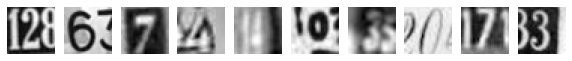

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [134]:
# Visualizing the first 10 images in the dataset and printing their labels

%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)
    
    plt.imshow(X_train[i], cmap = "gray")  # Write the function to visualize images

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [135]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [136]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [137]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

In [138]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [139]:
# Write the function and appropriate variable name to one-hot encode the output

y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

# test labels

y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [140]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [144]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Define the model

def cnn_model_1():

    model = Sequential() 
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate = 0.001)
    
    # Compile the model

    model.compile(
        loss='categorical_crossentropy', 
        optimizer=adam, 
        metrics=['accuracy'])
    
    return model

In [145]:
# Build the model

model_1 = cnn_model_1()

In [146]:
# Print the model summary

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                      

In [147]:
# Fit the model

history_model_1 = model_1.fit(
            X_train, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            batch_size = 32,
            verbose=1)

Epoch 1/20
1050/1050 [==============================] - 6s 5ms/step - loss: 1.1464 - accuracy: 0.6288 - val_loss: 0.5779 - val_accuracy: 0.8325
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.6271 - accuracy: 0.8106 - val_loss: 0.5360 - val_accuracy: 0.8462
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.5319 - accuracy: 0.8387 - val_loss: 0.4440 - val_accuracy: 0.8736
Epoch 4/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.4799 - accuracy: 0.8557 - val_loss: 0.4090 - val_accuracy: 0.8857
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.4391 - accuracy: 0.8665 - val_loss: 0.4198 - val_accuracy: 0.8743
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.4020 - accuracy: 0.8756 - val_loss: 0.3994 - val_accuracy: 0.8907
Epoch 7/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3840 - accuracy: 0.8818 - val_loss: 0.4096 - val_accuracy:

### **Plotting the validation and training accuracies**

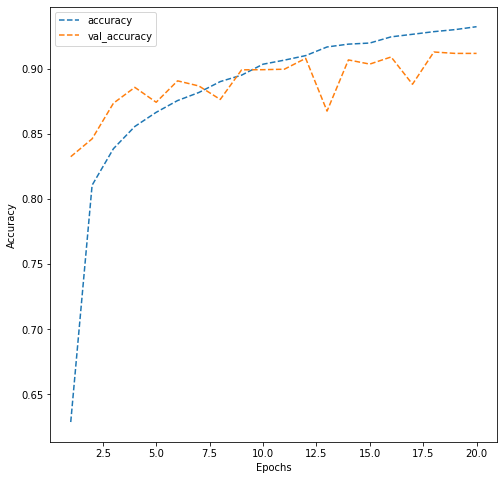

In [148]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:__________**


* From the chart above, we can clearly find that the accuracy of both train and validation data in CNN model are higher than that in ANN model. 

* By comparing the training and validation accuracy, the model is giving a good performance with 95% accuracy on training data and 90% on validation data.

* The model has performed poorly on the validation data. 

* From the above plot, we can find that the training accuracy is coninuously improving. However, the validation accuracy is continuously fluctuating. The validation accuracy started fluctuating after 4 epochs.





Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [149]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [150]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [151]:
# Define the model

def cnn_model_2():
    
    model = Sequential()
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate = 0.001)

    # Compile the model

    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [152]:
# Build the model

model_2 = cnn_model_2()

In [153]:
# Print the summary

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [154]:
# Fit the model

history_model_2 =  model_2.fit(
            X_train, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size = 128,
            verbose=1)

Epoch 1/30
263/263 [==============================] - 4s 12ms/step - loss: 1.4659 - accuracy: 0.4988 - val_loss: 2.4575 - val_accuracy: 0.2049
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 0.6966 - accuracy: 0.7850 - val_loss: 0.6191 - val_accuracy: 0.8204
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 0.5630 - accuracy: 0.8276 - val_loss: 0.4726 - val_accuracy: 0.8613
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4999 - accuracy: 0.8466 - val_loss: 0.4807 - val_accuracy: 0.8548
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4517 - accuracy: 0.8625 - val_loss: 0.4058 - val_accuracy: 0.8849
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4180 - accuracy: 0.8724 - val_loss: 0.4336 - val_accuracy: 0.8798
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 0.3846 - accuracy: 0.8809 - val_loss: 0.4616 - val_accuracy: 0.8674

### **Plotting the validation and training accuracies**

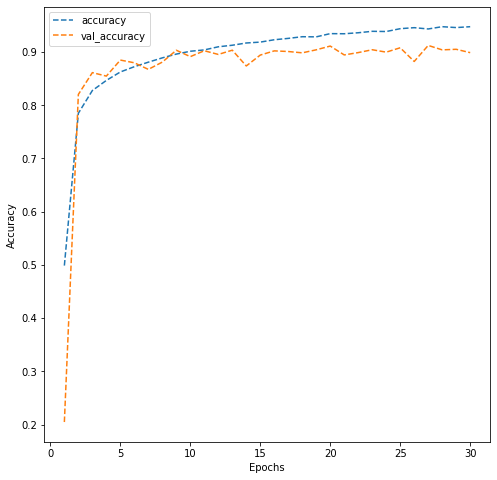

In [155]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:________**

* The second model performed well and reduce the overfitting compared to the model 1. 

* The validation accuracy has a slight fluctuation but overall it increased steadly with the extend of epoches.

* Model 2 is giving 93% accuracy on the training data and 90% on the validation data until 30 epochs. 

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [163]:
# Make prediction on the test data using model_2 

test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [164]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test_encoded, axis = -1)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1814
           1       0.88      0.91      0.90      1828
           2       0.93      0.92      0.92      1803
           3       0.89      0.84      0.87      1719
           4       0.91      0.92      0.91      1812
           5       0.92      0.88      0.90      1768
           6       0.88      0.88      0.88      1832
           7       0.91      0.93      0.92      1808
           8       0.88      0.89      0.88      1812
           9       0.86      0.89      0.88      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



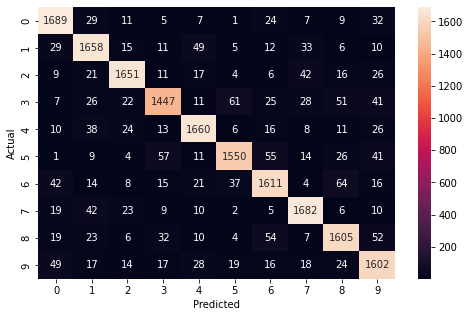

In [165]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(8,5))

sns.heatmap(cm, annot=True,  fmt='.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:_________**
* The model is giving about 90% accuracy on the test data which is comparable to the accuracy of the validation data. This implies that the model is giving a perfect performance. 

* The recall has a high range from 84% to 93% which represents that the model  can identify the majority of the object. The model can identify 93% of #0 and #7 but have a relative lower chance to identify 84% of #3.

* Considering the overall accuracy and f1-score, we can conclude that CNN models can identify the number in images accurately, compared to ANN models.